__Is there disparity between reviews and rating of book appraisal?__
* Are the review text and the ratings of books are inline with each other

In [1]:
import pandas as pd
import re
import time
import datetime

__Comics and Graphics__

In [16]:
review_comics = pd.read_json('books_review_comics_final.json')
books_metadata_comics = pd.read_json('books_metadata_comics.json')

In [17]:
review_comics.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments
0,0,dc3763cdb9b2cae805882878eebb6a32,18471619,66b2ba840f9bd36d6d27f46136fe4772,3,Sherlock Holmes and the Vampires of London \n ...,Thu Dec 05 10:44:25 -0800 2013,Thu Dec 05 10:45:15 -0800 2013,Tue Nov 05 00:00:00 -0800 2013,0,0
1,1,bafc2d50014200cda7cb2b6acd60cd73,6315584,72f1229aba5a88f9e72f0dcdc007dd22,4,"I've never really liked Spider-Man. I am, howe...",Wed Aug 10 06:06:48 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,Fri Aug 12 08:49:54 -0700 2016,0,0
2,3,bafc2d50014200cda7cb2b6acd60cd73,18454118,c3cc5a3e1d6b6c9cf1c044f306c8e752,5,I've been waiting so long for this. I first st...,Mon Mar 03 17:45:56 -0800 2014,Mon Mar 03 17:54:11 -0800 2014,Sat Mar 01 00:00:00 -0800 2014,1,0
3,4,bafc2d50014200cda7cb2b6acd60cd73,2239435,cc444be37ab0a42bfb4dd818cb5edd10,4,The only thing more entertaining than this boo...,Wed Apr 03 12:37:48 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,Wed Apr 03 13:03:36 -0700 2013,0,0
4,6,bafc2d50014200cda7cb2b6acd60cd73,13526176,68267ebf90e2da0d96a3d6aefb5b8ac7,3,This wasn't my favourite Black Butler book. I ...,Thu Nov 15 13:28:38 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,Thu Nov 15 13:32:17 -0800 2012,0,0


In [18]:
review_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330052 entries, 0 to 330051
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         330052 non-null  int64 
 1   user_id       330052 non-null  object
 2   book_id       330052 non-null  int64 
 3   review_id     330052 non-null  object
 4   rating        330052 non-null  int64 
 5   review_text   330052 non-null  object
 6   date_added    330052 non-null  object
 7   date_updated  330052 non-null  object
 8   read_at       330052 non-null  object
 9   n_votes       330052 non-null  int64 
 10  n_comments    330052 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 30.2+ MB


In [19]:
review_texts = review_comics[['book_id','review_text']]

In [20]:
review_texts.head()

,book_id,review_text
0,18471619,Sherlock Holmes and the Vampires of London \n ...
1,6315584,"I've never really liked Spider-Man. I am, howe..."
2,18454118,I've been waiting so long for this. I first st...
3,2239435,The only thing more entertaining than this boo...
4,13526176,This wasn't my favourite Black Butler book. I ...


In [8]:
def clean_data(df):
    total_time = 0
    start = time.time()
    
    review = pd.DataFrame()
    #combine title, abstract and full_literature to text column
    review['text'] = df['review_text']
    
    #convert text to lower case
    review['text']  = review['text'].str.lower()
    
    #remove punctuations
    #remove all non alphabetic characters
    regex_1 = re.compile(r'[^a-zA-Z]')
    review['text'] = pd.Series(review['text']).str.replace(regex_1, ' ')
    
    #reduce multi-space to single space
    regex_2 = re.compile(r' +')
    review['text'] = pd.Series(review['text']).str.replace(regex_2,' ')
   
    stop = time.time()
    duration = stop-start
    total_time = total_time + duration
    time_taken = str(datetime.timedelta(seconds=total_time))    
    print("Time taken/file :",duration)
    print("Total duration :",time_taken)
    
    return review

In [11]:
comics_reviews = clean_data(review_texts)

Time taken/file : 17.99536108970642
Total duration : 0:00:17.995361


In [12]:
comics_reviews.head()

,text
0,sherlock holmes and the vampires of london rel...
1,i ve never really liked spider man i am howeve...
2,i ve been waiting so long for this i first stu...
3,the only thing more entertaining than this boo...
4,this wasn t my favourite black butler book i w...


In [13]:
comics_reviews['book_id'] = review_texts['book_id']

In [14]:
comics_reviews.shape

(330052, 2)

In [15]:
comics_reviews.head()

,text,book_id
0,sherlock holmes and the vampires of london rel...,18471619
1,i ve never really liked spider man i am howeve...,6315584
2,i ve been waiting so long for this i first stu...,18454118
3,the only thing more entertaining than this boo...,2239435
4,this wasn t my favourite black butler book i w...,13526176


In [16]:
book_ids = books_metadata_comics['book_id']

In [17]:
book_ids.shape

(23937,)

In [18]:
comics_reviews = comics_reviews.loc[comics_reviews['book_id'].isin(book_ids)]

In [19]:
comics_reviews.shape

(329149, 2)

In [20]:
comics_reviews.head()

,text,book_id
0,sherlock holmes and the vampires of london rel...,18471619
1,i ve never really liked spider man i am howeve...,6315584
2,i ve been waiting so long for this i first stu...,18454118
3,the only thing more entertaining than this boo...,2239435
4,this wasn t my favourite black butler book i w...,13526176


In [21]:
review_result = pd.merge(books_metadata_comics[['book_id','publication_year']], comics_reviews, on='book_id')

In [22]:
review_result.shape

(329149, 3)

In [23]:
review_result.head()

,book_id,publication_year,text
0,13571772,2012,it s an o k story much better than some other ...
1,13571772,2012,a captain america story involving a russian as...
2,13571772,2012,i read this in order to prepare myself for the...
3,707611,1997,action
4,27036536,2016,ennis has written brilliant war stories in the...


# Sentiment analysis

In [26]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/uni/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [26]:
review_result['scores'] = review_result['text'].apply(lambda text: sid.polarity_scores(text))

In [27]:
review_result['compound'] = review_result['scores'].apply(lambda sc_dict: sc_dict['compound'])

In [28]:
review_result['neg'] = review_result['scores'].apply(lambda sc_dict: sc_dict['neg'])
review_result['neu'] = review_result['scores'].apply(lambda sc_dict: sc_dict['neu'])
review_result['pos'] = review_result['scores'].apply(lambda sc_dict: sc_dict['pos'])

In [29]:
review_result['compound'].min()

-0.9998

In [30]:
review_result.head()

,book_id,publication_year,text,scores,compound,neg,neu,pos
0,13571772,2012,it s an o k story much better than some other ...,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.7514,0.000,0.871,0.129
1,13571772,2012,a captain america story involving a russian as...,"{'neg': 0.032, 'neu': 0.902, 'pos': 0.066, 'co...",0.7002,0.032,0.902,0.066
2,13571772,2012,i read this in order to prepare myself for the...,"{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'comp...",0.9535,0.000,0.804,0.196
3,707611,1997,action,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,1.000,0.000
4,27036536,2016,ennis has written brilliant war stories in the...,"{'neg': 0.104, 'neu': 0.55, 'pos': 0.347, 'com...",0.6956,0.104,0.550,0.347


In [32]:
#comics_reviews_sentiment = review_result[['publication_year','compound']]

In [33]:
#mean_comics_sentiment = comics_reviews_sentiment.groupby('publication_year').agg('mean')

In [34]:
#mean_comics_sentiment.head()

In [35]:
#mean_comics_sentiment.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='sentiment')

In [36]:
#corr_matrix = pd.DataFrame(mean_comics_sentiment)
#corr_matrix.shape

In [37]:
#rating = books_metadata_comics[['publication_year','average_rating']].groupby('publication_year').agg('mean')
#rating = pd.DataFrame(rating)

In [38]:
#rating.shape

In [39]:
#corr_matrix['rating'] = rating['average_rating']

In [40]:
#corr_matrix.head()

In [41]:
#corr_matrix.corr()

__pos neu neg sentiment per publication year__

In [42]:
pos_neu_neg = review_result[['publication_year','pos','neu','neg']]

In [43]:
pos_neu_neg.head()

,publication_year,pos,neu,neg
0,2012,0.129,0.871,0.000
1,2012,0.066,0.902,0.032
2,2012,0.196,0.804,0.000
3,1997,0.000,1.000,0.000
4,2016,0.347,0.550,0.104


In [44]:
pos_neu_neg = pos_neu_neg.groupby('publication_year').agg('mean')
pos_neu_neg.head()

,pos,neu,neg
publication_year,,,
1986,0.190792,0.718015,0.079784
1987,0.207278,0.717357,0.057762
1988,0.195794,0.747070,0.052789
1989,0.172579,0.736890,0.071368
1990,0.196705,0.728524,0.066894


<AxesSubplot:xlabel='publication_year', ylabel='sentiment'>

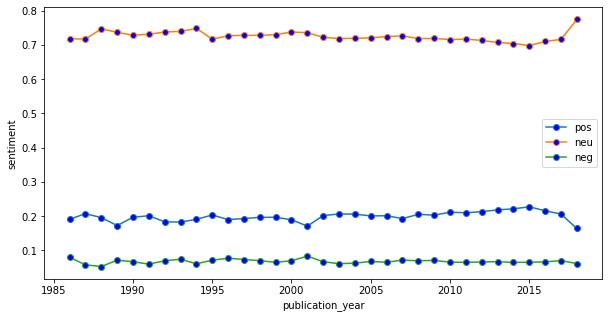

In [45]:
pos_neu_neg.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='sentiment')

__Mystery Thriller and Crime__

In [2]:
!ls

Untitled.rtf                   books_review_thriller.json
books_interactions_final.json  readme.rtf
books_metadata_comics.json     rq1.ipynb
books_metadata_thriller.json   rq2.ipynb
books_review_comics_final.json


In [11]:
books_metadata_thriller = pd.read_json('books_metadata_thriller.json')
review_thriller = pd.read_json('books_review_thriller.json')

In [12]:
review_thriller.head()

,index,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,n_votes,n_comments
0,1,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,22,0
1,2,8842281e1d1347389f2ab93d60773d4d,32283133,8e4d61801907e591018bdc3442a9cf2b,0,http://www.telegraph.co.uk/culture/10...,Tue Nov 01 11:09:18 -0700 2016,Tue Nov 01 11:09:44 -0700 2016,,9,0
2,3,8842281e1d1347389f2ab93d60773d4d,17860739,022bb6daffa49adc27f6b20b6ebeb37d,4,An amazing and unique creation: JJ Abrams and ...,Wed Mar 26 13:51:30 -0700 2014,Tue Sep 23 01:44:36 -0700 2014,Sun Sep 21 00:00:00 -0700 2014,7,0
3,4,8842281e1d1347389f2ab93d60773d4d,8694005,0e317947e1fd341f573192111bb2921d,3,The Name of the Rose is a thrilling Dan Brown-...,Wed Sep 08 01:22:27 -0700 2010,Wed Dec 14 12:30:43 -0800 2016,Mon Aug 10 00:00:00 -0700 2015,17,6
4,6,8842281e1d1347389f2ab93d60773d4d,2429135,efee7a3f620ed640366226caa7b138f0,5,I haven't stayed up until 5am to finish a book...,Mon Mar 15 14:05:04 -0700 2010,Wed Mar 22 11:46:43 -0700 2017,Sun Mar 28 00:00:00 -0700 2010,13,10


In [13]:
review_thriller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056240 entries, 0 to 1056239
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   index         1056240 non-null  int64 
 1   user_id       1056240 non-null  object
 2   book_id       1056240 non-null  int64 
 3   review_id     1056240 non-null  object
 4   rating        1056240 non-null  int64 
 5   review_text   1056240 non-null  object
 6   date_added    1056240 non-null  object
 7   date_updated  1056240 non-null  object
 8   read_at       1056240 non-null  object
 9   n_votes       1056240 non-null  int64 
 10  n_comments    1056240 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 96.7+ MB


In [14]:
thriller_review_text = review_thriller[['book_id','review_text']]

In [15]:
thriller_review_text.head()

,book_id,review_text
0,28684704,"A fun, fast paced science fiction thriller. I ..."
1,32283133,http://www.telegraph.co.uk/culture/10...
2,17860739,An amazing and unique creation: JJ Abrams and ...
3,8694005,The Name of the Rose is a thrilling Dan Brown-...
4,2429135,I haven't stayed up until 5am to finish a book...


In [17]:
thriller_reviews = clean_data(thriller_review_text)

Time taken/file : 72.29346895217896
Total duration : 0:01:12.293469


In [18]:
thriller_reviews.head()

,text
0,a fun fast paced science fiction thriller i re...
1,http www telegraph co uk culture
2,an amazing and unique creation jj abrams and d...
3,the name of the rose is a thrilling dan brown ...
4,i haven t stayed up until am to finish a book ...


In [19]:
thriller_reviews['book_id'] = thriller_review_text['book_id']

In [22]:
thriller_reviews.shape

(1056240, 2)

In [23]:
thriller_reviews.head()

,text,book_id
0,a fun fast paced science fiction thriller i re...,28684704
1,http www telegraph co uk culture,32283133
2,an amazing and unique creation jj abrams and d...,17860739
3,the name of the rose is a thrilling dan brown ...,8694005
4,i haven t stayed up until am to finish a book ...,2429135


In [24]:
thriller_review_result = pd.merge(books_metadata_thriller[['book_id','publication_year']], thriller_reviews, on='book_id')

In [25]:
thriller_review_result.head()

,book_id,publication_year,text
0,16158998,2013,a good solid miss marple mystery after listeni...
1,22722787,2014,jonathan ashley crams a lot into the cost of d...
2,16158996,2013,another excellent miss marple story beautifull...
3,17368265,2013,this review is from an arc i picked up at book...
4,17368265,2013,agent pendergast has become one of my favorite...


# __Sentiment analysis__

In [28]:
thriller_review_result['scores'] = thriller_review_result['text'].apply(lambda text: sid.polarity_scores(text))

In [29]:
thriller_review_result['compound'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['compound'])
thriller_review_result['neg'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['neg'])
thriller_review_result['neu'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['neu'])
thriller_review_result['pos'] = thriller_review_result['scores'].apply(lambda sc_dict: sc_dict['pos'])

In [30]:
thriller_review_result.head()

,book_id,publication_year,text,scores,compound,neg,neu,pos
0,16158998,2013,a good solid miss marple mystery after listeni...,"{'neg': 0.089, 'neu': 0.817, 'pos': 0.095, 'co...",-0.1531,0.089,0.817,0.095
1,22722787,2014,jonathan ashley crams a lot into the cost of d...,"{'neg': 0.162, 'neu': 0.759, 'pos': 0.078, 'co...",-0.9728,0.162,0.759,0.078
2,16158996,2013,another excellent miss marple story beautifull...,"{'neg': 0.123, 'neu': 0.308, 'pos': 0.569, 'co...",0.7783,0.123,0.308,0.569
3,17368265,2013,this review is from an arc i picked up at book...,"{'neg': 0.097, 'neu': 0.756, 'pos': 0.148, 'co...",0.9584,0.097,0.756,0.148
4,17368265,2013,agent pendergast has become one of my favorite...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.8151,0.000,0.791,0.209


__positive neutral and negative sentiment per publication year__

In [31]:
thriller_pos_neu_neg = thriller_review_result[['publication_year','pos','neu','neg']]

In [32]:
thriller_pos_neu_neg.head()

,publication_year,pos,neu,neg
0,2013,0.095,0.817,0.089
1,2014,0.078,0.759,0.162
2,2013,0.569,0.308,0.123
3,2013,0.148,0.756,0.097
4,2013,0.209,0.791,0.000


In [33]:
thriller_pos_neu_neg = thriller_pos_neu_neg.groupby('publication_year').agg('mean')
thriller_pos_neu_neg.head()

,pos,neu,neg
publication_year,,,
1946,0.152537,0.758829,0.088488
1950,0.131324,0.788691,0.080103
1951,0.154098,0.730373,0.095784
1952,0.147729,0.769917,0.082375
1953,0.157244,0.774077,0.068679


<AxesSubplot:xlabel='publication_year', ylabel='sentiment'>

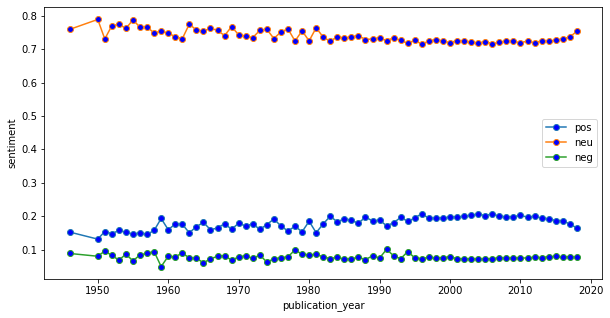

In [34]:
thriller_pos_neu_neg.plot.line(style='-o', figsize=(10,5), markerfacecolor='blue', ylabel='sentiment')